In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages')
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
# plt.rcParams['figure.dpi'] = 300

In [2]:
from preprocessing import *
from helper import *

Number of routes after scraping: 30642
Number of routes after cleaning: 25099


In [6]:
# Display MB image

# show_image()

In [7]:
# display example of a route

# r = {'start': [[0,0]], 'mid': [[2,2], [6,6]], 'end': [[0,17],[4,17]]}
# display_route(r)

In [8]:
# grade map
print(grade_map)

{'6B': 0, '6B+': 0, '6C': 1, '6C+': 1, '7A': 2, '7A+': 3, '7B': 4, '7B+': 4, '7C': 5, '7C+': 6, '8A': 7, '8A+': 8, '8B': 9}


## Distribution of grades

In [9]:
all_grades = []

repeats_list = [0] * 10

number_of_holds_list = []

for key, item in mb_2016.items():
    all_grades.append(item['grade'] + 4)
    grade = item['grade']
    repeats = item['repeats']
    repeats_list[grade] += repeats
    number_of_holds_list.append(len(item['start']) + len(item['mid']) + len(item['end']))

all_grades_count = []
all_grades_percentages = []

for i in range(4, 14):
    n = all_grades.count(i)
    all_grades_count.append(n)
    all_grades_percentages.append(n*100/len(all_grades))

repeats_total = sum(repeats_list)
repeats_percentages = []
for i in repeats_list:
    repeats_percentages.append(i*100/repeats_total)

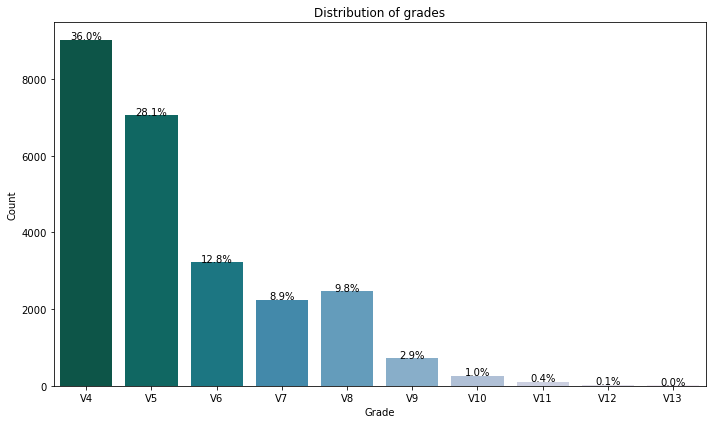

In [10]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
x = ['V' + str(grade) for grade in range(4, 14)]
y = all_grades_count
percentage = all_grades_percentages
ax = sns.barplot(x=x, y=y, palette='PuBuGn_r')
ax.set(xlabel='Grade', ylabel='Count', title = 'Distribution of grades')
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+15
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()

## Distribution of repeats

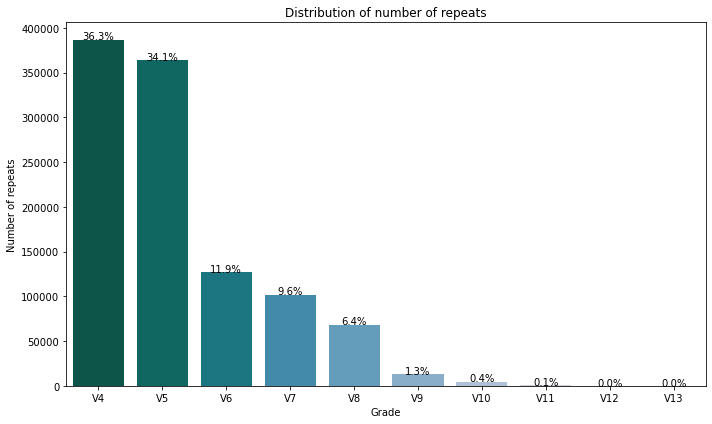

In [11]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
x = ['V' + str(grade) for grade in range(4, 14)]
y = repeats_list
percentage = repeats_percentages
ax = sns.barplot(x=x, y=y, palette='PuBuGn_r')
ax.set(xlabel='Grade', ylabel='Number of repeats', title = 'Distribution of number of repeats')
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+15
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()

## Distribution of number of holds

Text(0.5, 0.98, 'Number of Holds Distribution for Each Grade')

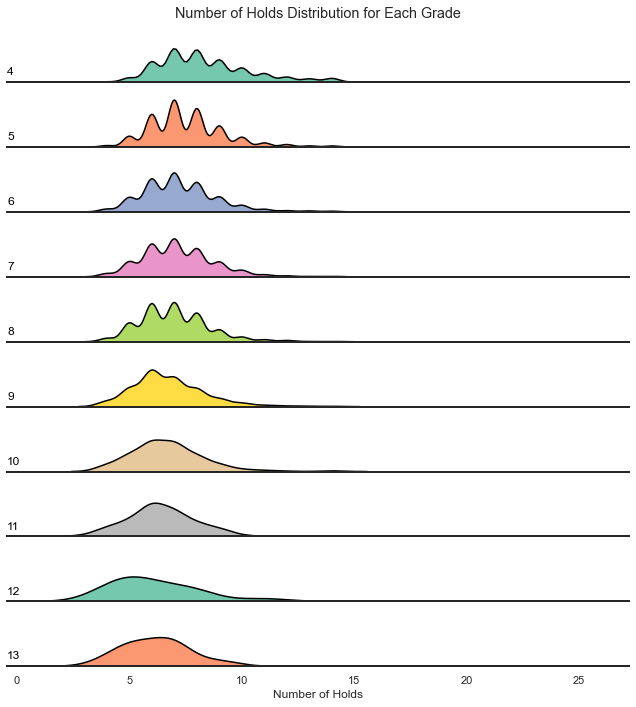

In [12]:
df_dict = {'grade': all_grades, 'number of holds': number_of_holds_list}
df = pd.DataFrame(df_dict)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df, palette=palette, row="grade", hue="grade", aspect=9, height=1)
g.map_dataframe(sns.kdeplot, x="number of holds", fill=True, alpha=0.9)
g.map_dataframe(sns.kdeplot, x="number of holds", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=12,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "grade")
g.fig.subplots_adjust(hspace=5)
g.set_titles("")
g.set(yticks=[], xlabel="Number of Holds")
g.despine( left=True)
plt.suptitle('Number of Holds Distribution for Each Grade', y=0.98)

## Heat Maps

In [13]:
mb_2016_grades = {}
for key in mb_2016:
    mb_2016_grades[key] = mb_2016[key]['grade']

In [14]:
heat_all = heat_matrix(mb_2016, [*range(0,10)])
heat_v4_5 = heat_matrix(mb_2016, [0, 1])
heat_v6_9 = heat_matrix(mb_2016, [2, 3, 4, 5])
heat_v10_13= heat_matrix(mb_2016, [6, 7, 8, 9])

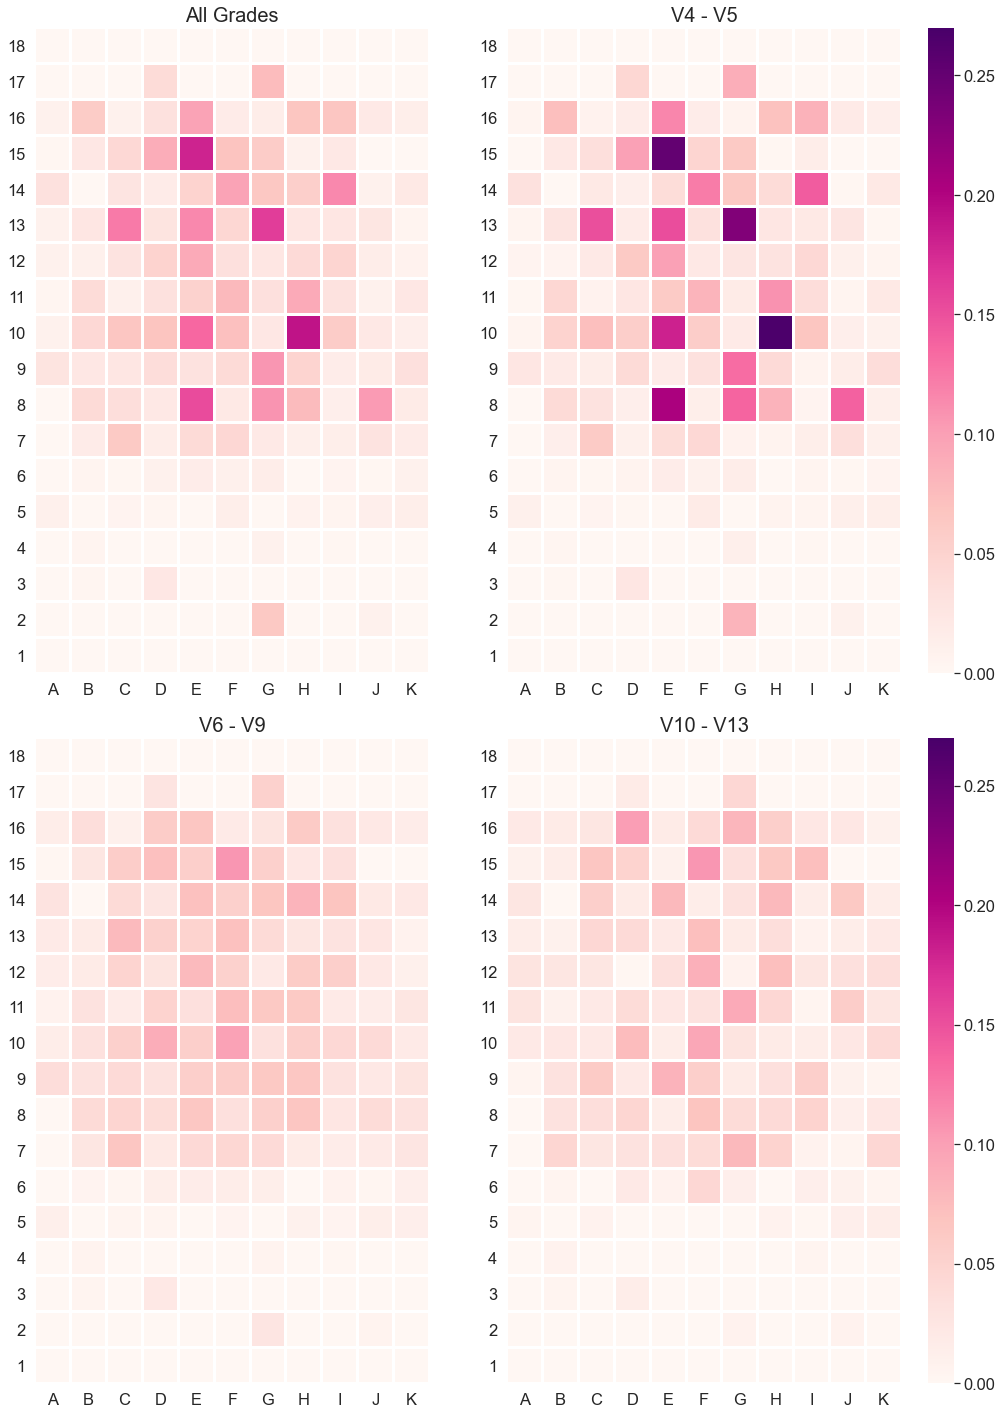

In [15]:
fig = plt.figure(figsize=(15, 20))
sns.set(font_scale=1.5)

x_list = ['A','B','C','D','E','F','G','H','I','J','K']

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.heatmap(heat_all, ax=ax1, linewidth=2, xticklabels = x_list, cmap="RdPu", square = True, vmin=0, vmax=0.27, cbar=False)
sns.heatmap(heat_v4_5, ax=ax2, linewidth=2, xticklabels = x_list, cmap="RdPu", square = True, vmin=0, vmax=0.27, cbar_kws={"aspect": 25})
sns.heatmap(heat_v6_9, ax=ax3, linewidth=2, xticklabels = x_list, cmap="RdPu", square = True, vmin=0, vmax=0.27, cbar=False)
sns.heatmap(heat_v10_13, ax=ax4, linewidth=2, xticklabels = x_list, cmap="RdPu", square = True, vmin=0, vmax=0.27, cbar_kws={"aspect": 25})

ax1.set_yticklabels(range(18, 0, -1),rotation=0)
ax2.set_yticklabels(range(18, 0, -1),rotation=0)
ax3.set_yticklabels(range(18, 0, -1),rotation=0)
ax4.set_yticklabels(range(18, 0, -1),rotation=0)

ax1.set_title('All Grades', fontsize=20)
ax2.set_title('V4 - V5', fontsize=20)
ax3.set_title('V6 - V9', fontsize=20)
ax4.set_title('V10 - V13', fontsize=20)

plt.show()

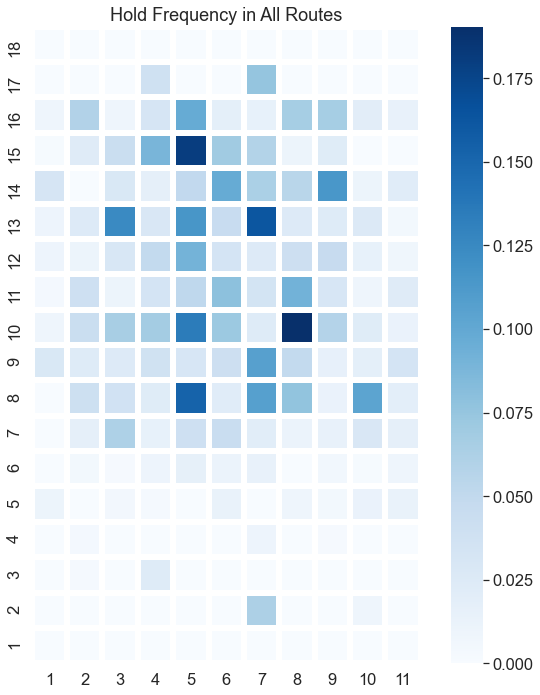

In [16]:
# plot individual graphs
heat_all = heat_matrix(mb_2016, [*range(0,10)])
heat_v4 = heat_matrix(mb_2016, [0])

plt.figure(figsize=(9, 10))
sns.set(font_scale=1.5)
ax = sns.heatmap(heat_all, linewidth=5, xticklabels = range(1, 12), yticklabels = range(18, 0, -1), cmap="Blues", square = True)
plt.title('Hold Frequency in All Routes')
plt.show()

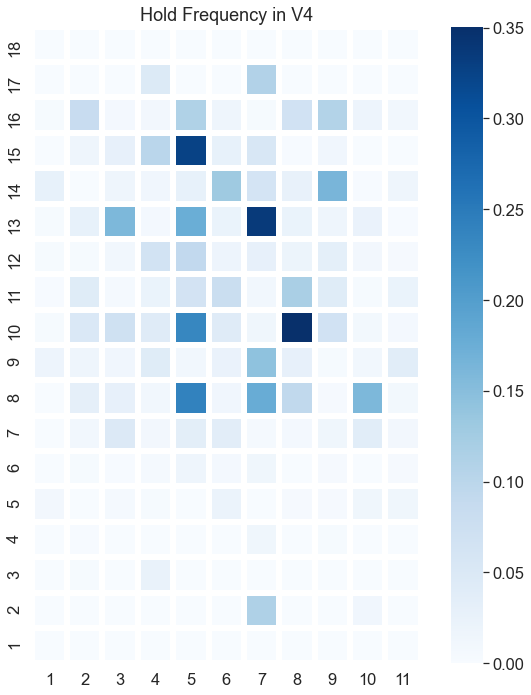

In [17]:
plt.figure(figsize=(9, 10))
sns.set(font_scale=1.5)
ax = sns.heatmap(heat_v4, linewidth=5, xticklabels = range(1, 12), yticklabels = range(18, 0, -1), cmap="Blues", square = True)
plt.title('Hold Frequency in V4')
plt.show()

## PCA Analysis

In [18]:
matrices = get_matrices(mb_2016, ['start','mid','end'])[0]

# reshaped
vectors = {}
for i in matrices:
    vectors[i] = np.array(matrices[i]).reshape(1, 198)
grades = {}
for key in mb_2016:
    grades[key] = mb_2016[key]['grade']

grades_list = list(grades.values())
vectors_list = list(vectors.values())

data = []

for i in range(len(grades_list)):
    data.append([])
    
    vector = vectors_list[i][0]
    grade = grades_list[i]
    for j in range(11*18):
        data[i].append(vector[j])
    data[i].append(grade)

df = pd.DataFrame(data)
df.rename(columns = {198:'Grade'}, inplace = True)
#df

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

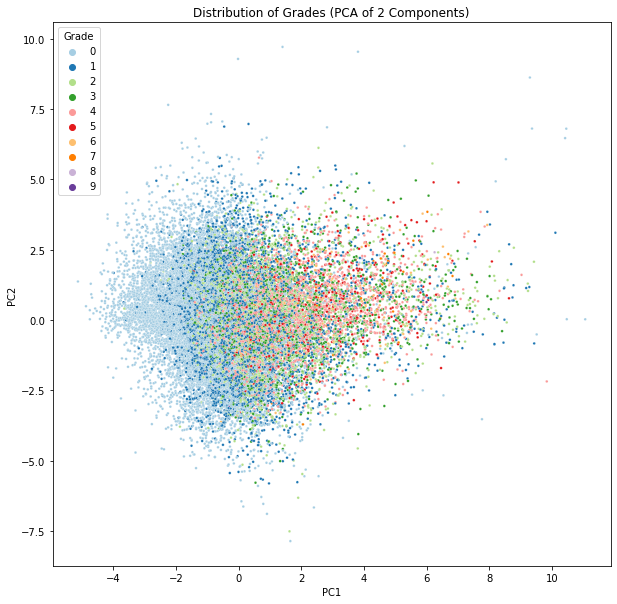

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)

plt.rcParams["figure.figsize"] = [10, 10]

ax = sns.scatterplot(x=Xt[:,0], y=Xt[:,1], hue=y, palette="Paired", s = 7)
ax.set(xlabel='PC1', ylabel='PC2', title = 'Distribution of Grades (PCA of 2 Components)')
#plt.legend(facecolor='white', framealpha=1)
plt.show()

## Save data to pickle

In [68]:
df_cleaned = pd.DataFrame(mb_2016).T
df_cleaned.head()
df_cleaned.to_csv('cleaned.csv')

In [55]:
print(mb_2016['367892'])

{'start': [[0, 4], [3, 5]], 'mid': [[4, 8], [0, 8], [2, 12], [3, 14]], 'end': [[0, 17]], 'grade': 1, 'user_grade': None, 'is_benchmark': False, 'repeats': 1, 'url': 'https://moonboard.com/Problems/View/367892/cats-are-furry-children'}


In [62]:
dff = pd.read_csv('cleaned.csv', index_col=False)
dff = dff.rename(columns={'Unnamed: 0': 'ID'})
dff.head()

,ID,start,mid,end,grade,user_grade,is_benchmark,repeats,url
0,367892,"[[0, 4], [3, 5]]","[[4, 8], [0, 8], [2, 12], [3, 14]]","[[0, 17]]",1,NaN,False,1,https://moonboard.com/Problems/View/367892/cat...
1,367885,"[[0, 4]]","[[1, 7], [3, 11], [5, 13]]","[[8, 17]]",2,NaN,False,1,https://moonboard.com/Problems/View/367885/gulag
2,367880,"[[5, 4], [8, 3]]","[[7, 7], [7, 9], [7, 12], [4, 14]]","[[6, 17]]",0,NaN,False,1,https://moonboard.com/Problems/View/367880/sma...
3,367874,"[[5, 4]]","[[4, 7], [1, 10], [4, 12], [6, 12], [6, 16]]","[[6, 17]]",0,NaN,False,4,https://moonboard.com/Problems/View/367874/min...
4,367871,"[[5, 4]]","[[3, 16], [6, 12], [6, 10]]","[[2, 17]]",2,NaN,False,1,https://moonboard.com/Problems/View/367871/la-...


In [69]:
import pickle
pickle.dump(mb_2016, open('cleaned.p', 'wb'))

In [70]:
with open('cleaned.p', 'rb') as f:
    xx = pickle.load(f)

{'start': [[0, 4], [3, 5]], 'mid': [[4, 8], [0, 8], [2, 12], [3, 14]], 'end': [[0, 17]], 'grade': 1, 'user_grade': None, 'is_benchmark': False, 'repeats': 1, 'url': 'https://moonboard.com/Problems/View/367892/cats-are-furry-children'}
{'start': [[0, 4]], 'mid': [[1, 7], [3, 11], [5, 13]], 'end': [[8, 17]], 'grade': 2, 'user_grade': None, 'is_benchmark': False, 'repeats': 1, 'url': 'https://moonboard.com/Problems/View/367885/gulag'}
{'start': [[5, 4], [8, 3]], 'mid': [[7, 7], [7, 9], [7, 12], [4, 14]], 'end': [[6, 17]], 'grade': 0, 'user_grade': None, 'is_benchmark': False, 'repeats': 1, 'url': 'https://moonboard.com/Problems/View/367880/smashing-tasha-6b'}
{'start': [[5, 4]], 'mid': [[4, 7], [1, 10], [4, 12], [6, 12], [6, 16]], 'end': [[6, 17]], 'grade': 0, 'user_grade': None, 'is_benchmark': False, 'repeats': 4, 'url': 'https://moonboard.com/Problems/View/367874/mini-magnum'}
{'start': [[5, 4]], 'mid': [[3, 16], [6, 12], [6, 10]], 'end': [[2, 17]], 'grade': 2, 'user_grade': None, 'is_

{'start': [[0, 4], [1, 2]], 'mid': [[1, 7], [5, 10], [3, 10], [8, 13]], 'end': [[4, 17]], 'grade': 1, 'user_grade': None, 'is_benchmark': False, 'repeats': 1, 'url': 'https://moonboard.com/Problems/View/356561/pisseidebole'}
{'start': [[5, 4]], 'mid': [[6, 1], [4, 7], [5, 10], [2, 12], [3, 14], [4, 15]], 'end': [[1, 17]], 'grade': 0, 'user_grade': None, 'is_benchmark': False, 'repeats': 5, 'url': 'https://moonboard.com/Problems/View/356560/jopet'}
{'start': [[8, 3], [5, 4]], 'mid': [[7, 7], [4, 9], [6, 9], [4, 12], [3, 16], [0, 13]], 'end': [[0, 17]], 'grade': 1, 'user_grade': None, 'is_benchmark': False, 'repeats': 2, 'url': 'https://moonboard.com/Problems/View/356558/yo-can-t-beat-it'}
{'start': [[10, 4]], 'mid': [[9, 6], [9, 8], [5, 9], [6, 13]], 'end': [[6, 17]], 'grade': 1, 'user_grade': None, 'is_benchmark': False, 'repeats': 1, 'url': 'https://moonboard.com/Problems/View/356554/damigella-d-onore'}
{'start': [[5, 4], [1, 5]], 'mid': [[4, 9], [8, 6], [5, 12], [3, 14]], 'end': [[3,

{'start': [[9, 4]], 'mid': [[7, 9], [10, 13], [6, 14]], 'end': [[8, 17]], 'grade': 1, 'user_grade': None, 'is_benchmark': False, 'repeats': 4, 'url': 'https://moonboard.com/Problems/View/349945/full-house'}
{'start': [[3, 2], [1, 3]], 'mid': [[3, 10], [5, 9], [1, 7], [5, 14]], 'end': [[2, 17]], 'grade': 2, 'user_grade': None, 'is_benchmark': False, 'repeats': 3, 'url': 'https://moonboard.com/Problems/View/349943/underbear'}
{'start': [[5, 4]], 'mid': [[4, 9], [8, 8], [5, 13]], 'end': [[8, 17]], 'grade': 2, 'user_grade': None, 'is_benchmark': False, 'repeats': 5, 'url': 'https://moonboard.com/Problems/View/349941/the-big-yeet'}
{'start': [[5, 4]], 'mid': [[5, 9], [1, 7], [1, 12], [3, 14]], 'end': [[3, 17]], 'grade': 0, 'user_grade': None, 'is_benchmark': False, 'repeats': 8, 'url': 'https://moonboard.com/Problems/View/349938/ryan-sandbags'}
{'start': [[5, 5]], 'mid': [[8, 11], [2, 11], [5, 8], [5, 14]], 'end': [[2, 17], [7, 17]], 'grade': 2, 'user_grade': None, 'is_benchmark': False, 'r

{'start': [[3, 4], [0, 4]], 'mid': [[1, 7], [1, 8], [5, 9], [4, 12], [6, 12], [1, 15]], 'end': [[4, 17]], 'grade': 1, 'user_grade': None, 'is_benchmark': False, 'repeats': 3, 'url': 'https://moonboard.com/Problems/View/342749/bouncy-castle'}
{'start': [[5, 4], [6, 1]], 'mid': [[4, 7], [6, 7], [6, 8], [7, 10], [4, 10], [6, 12], [4, 14], [7, 15], [4, 9], [7, 9], [4, 12]], 'end': [[6, 17]], 'grade': 0, 'user_grade': None, 'is_benchmark': False, 'repeats': 5, 'url': 'https://moonboard.com/Problems/View/342745/team-mesa-rim-1'}
{'start': [[6, 3]], 'mid': [[4, 6], [4, 7], [1, 9], [2, 11], [4, 12], [7, 15]], 'end': [[6, 17]], 'grade': 1, 'user_grade': None, 'is_benchmark': False, 'repeats': 3, 'url': 'https://moonboard.com/Problems/View/342738/no-oats'}
{'start': [[1, 2]], 'mid': [[7, 9], [10, 9], [8, 12], [5, 15], [3, 6]], 'end': [[4, 17]], 'grade': 4, 'user_grade': None, 'is_benchmark': False, 'repeats': 1, 'url': 'https://moonboard.com/Problems/View/342737/yeetus-yeetus'}
{'start': [[10, 4

{'start': [[5, 4]], 'mid': [[3, 2], [3, 14], [2, 6], [3, 9], [2, 12]], 'end': [[4, 17]], 'grade': 1, 'user_grade': None, 'is_benchmark': False, 'repeats': 7, 'url': 'https://moonboard.com/Problems/View/333808/playground-warmupp'}
{'start': [[6, 3]], 'mid': [[9, 6], [6, 8], [6, 9], [2, 12], [3, 14]], 'end': [[0, 17]], 'grade': 1, 'user_grade': None, 'is_benchmark': False, 'repeats': 3, 'url': 'https://moonboard.com/Problems/View/333807/the-birth-of-tragedy'}
{'start': [[7, 4], [4, 5]], 'mid': [[6, 8], [7, 11], [10, 13], [6, 16], [7, 15]], 'end': [[3, 17]], 'grade': 1, 'user_grade': None, 'is_benchmark': False, 'repeats': 4, 'url': 'https://moonboard.com/Problems/View/333806/the-will-to-power'}
{'start': [[6, 3], [6, 5]], 'mid': [[4, 7], [4, 11], [1, 14], [6, 16], [4, 15]], 'end': [[8, 17]], 'grade': 1, 'user_grade': None, 'is_benchmark': False, 'repeats': 4, 'url': 'https://moonboard.com/Problems/View/333805/beyond-good-and-evil'}
{'start': [[6, 3], [8, 3]], 'mid': [[9, 5], [8, 5], [9, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

